## Run the Self-Organizing Map
Training sample: KiDS <br>
Labeling sample: GAMA <br>
___

First, load the data

In [32]:
from astropy.io import fits
from astropy.table import Table, hstack

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Georgia',
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix',
    'axes.linewidth': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

In [33]:
#Load in KiDS data
with fits.open('/data2/lsajkov/mpdg/data_products/KiDS/KiDS_SOM_catalog_15Jul24.fits') as cat:
    KiDS_cat = Table(cat[1].data)

#Load in GAMA data
with fits.open('/data2/lsajkov/mpdg/data_products/GAMA/GAMA_SOM_training_catalog_15Jul24.fits') as cat:
    GAMA_cat = Table(cat[1].data)

#Load in DESI data
with fits.open('/data2/lsajkov/mpdg/data_products/DESI/DESI_SOM_catalog_11Jul24.fits') as cat:
    DESI_cat = Table(cat[1].data)

Text(0, 0.5, '$i-Z$')

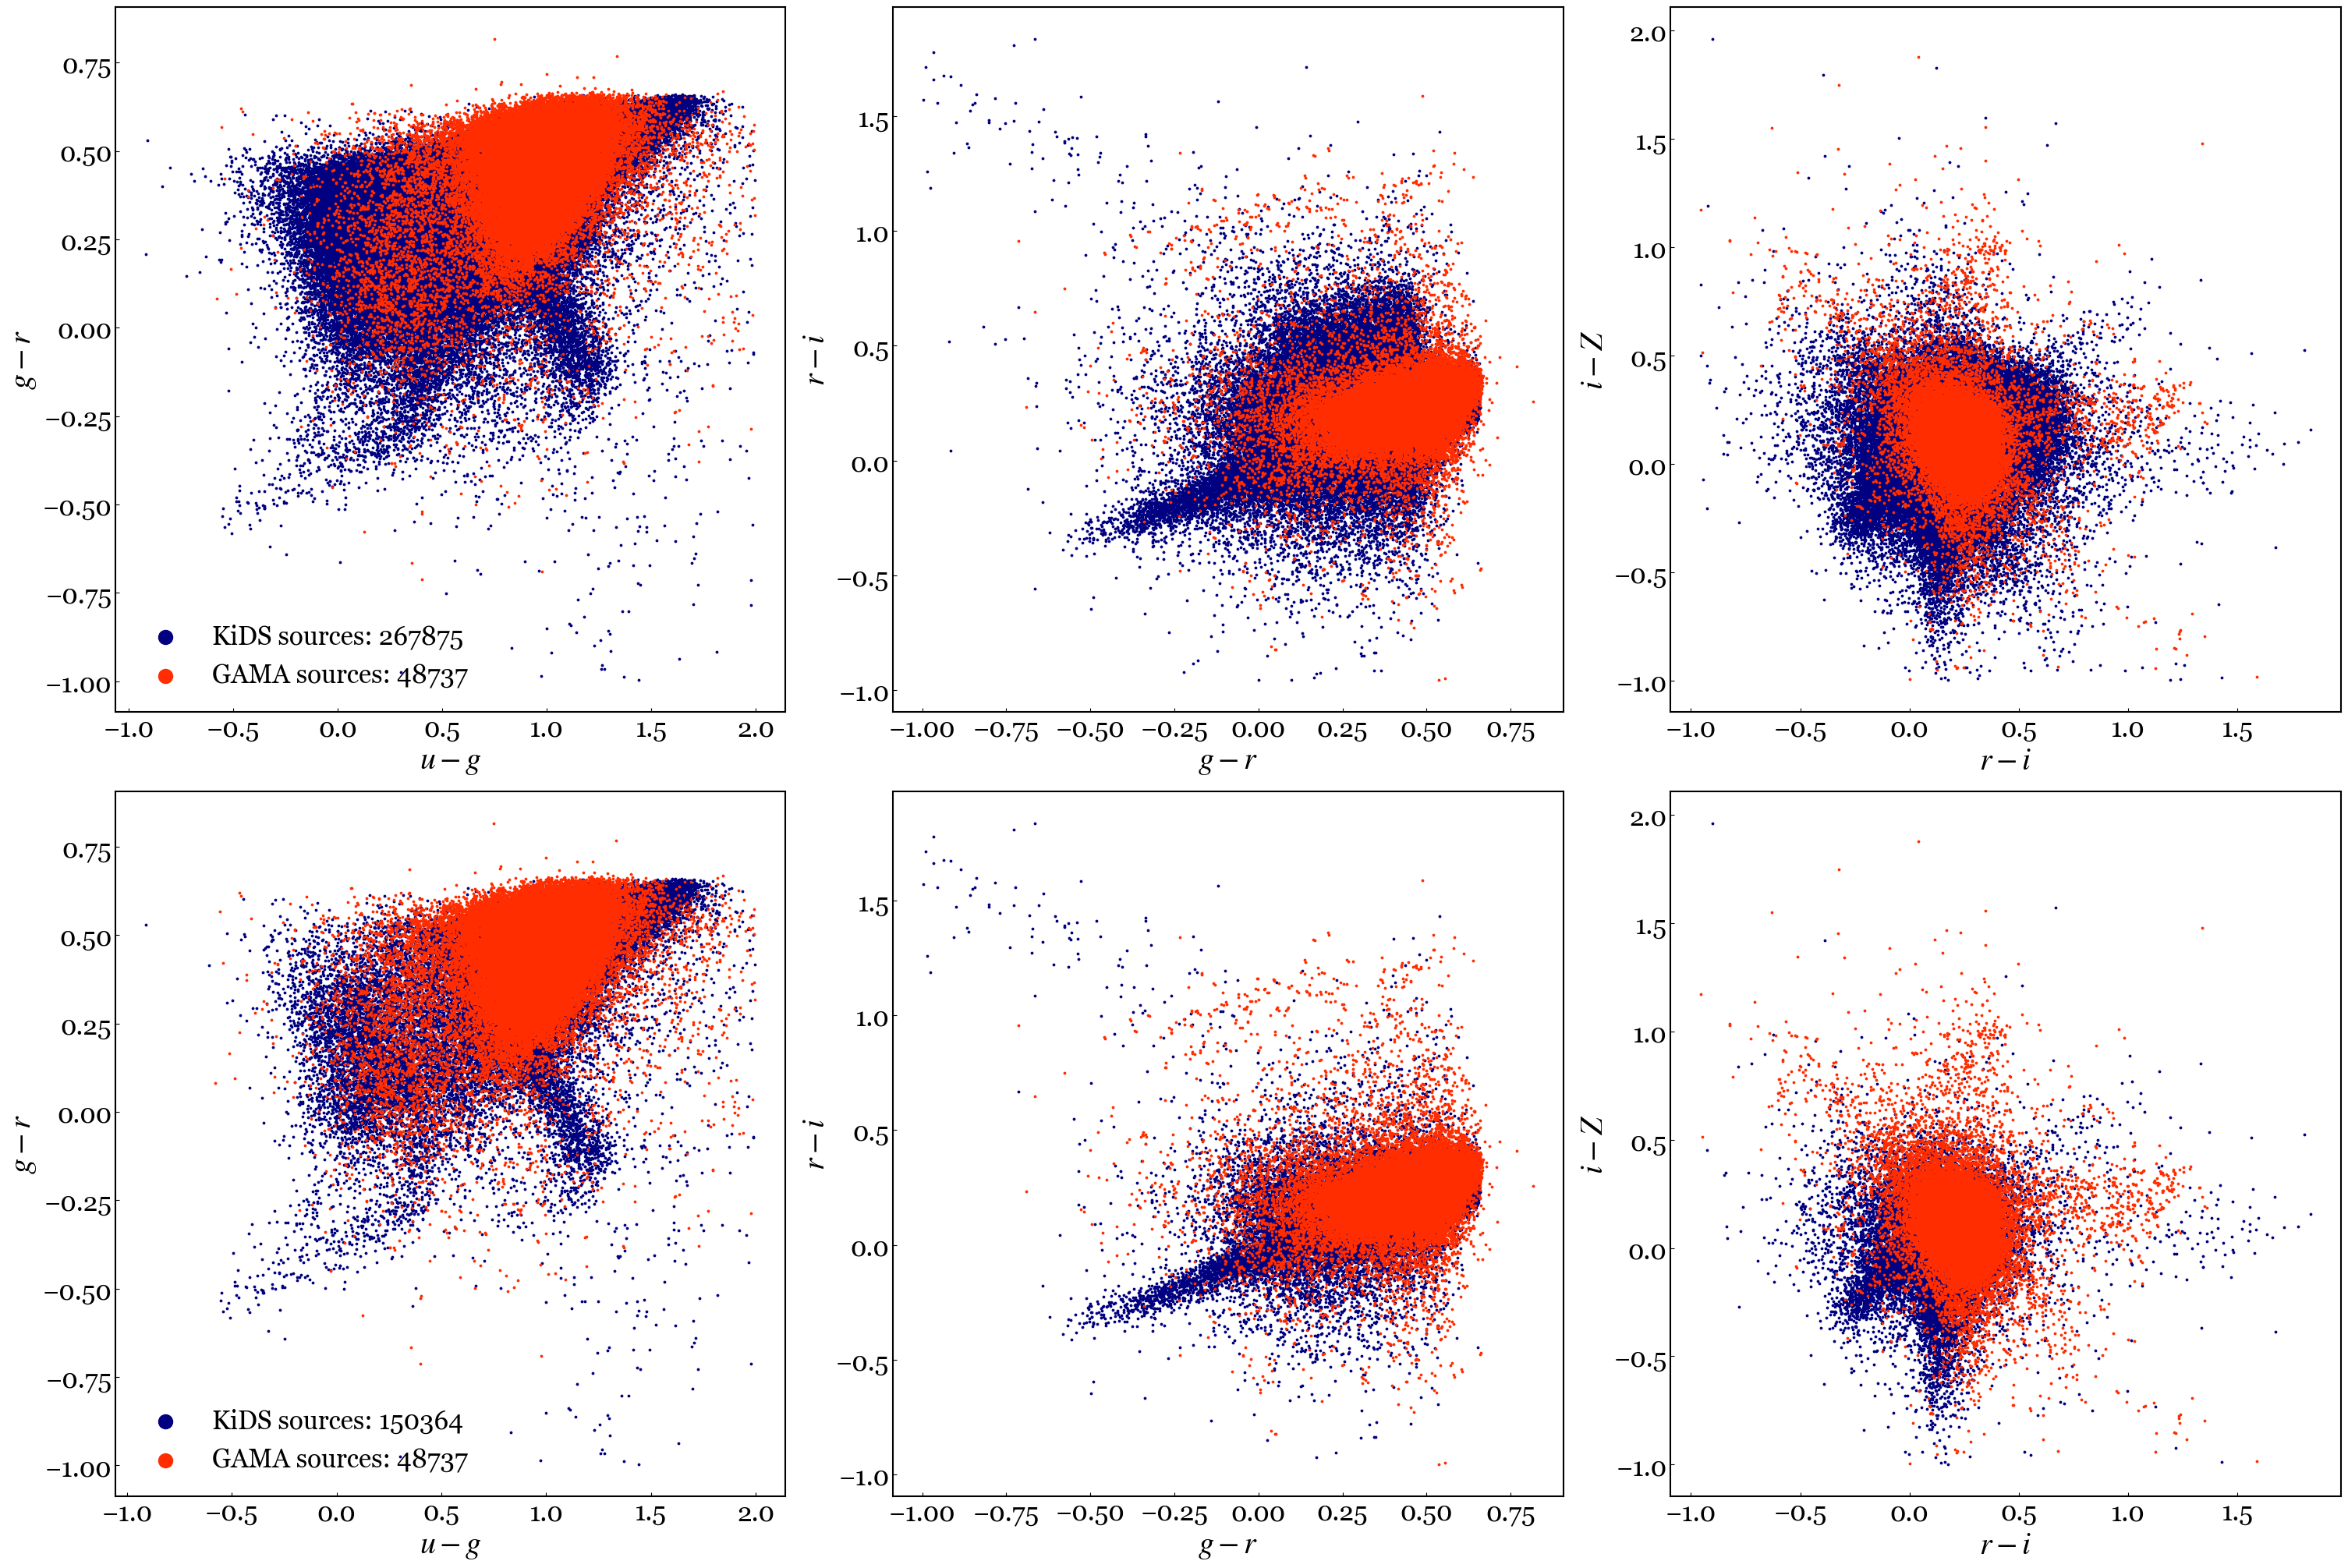

In [3]:
#Visualize input to make sure datasets overlap
fig = plt.figure(figsize = (30, 20), constrained_layout = True)

ax1 = fig.add_subplot(231)
ax1.scatter(KiDS_cat['ug_col'], KiDS_cat['gr_col'],
            color = mpl.cm.jet(0), s = 3,
            label = f'KiDS sources: {len(KiDS_cat)}')
ax1.scatter(GAMA_cat['ug_col'], GAMA_cat['gr_col'],
            color = mpl.cm.jet(220), s = 3,
            label = f'GAMA sources: {len(GAMA_cat)}')
ax1.set_xlabel('$u-g$'); ax1.set_ylabel('$g-r$')
ax1.legend(frameon = False, loc = 'lower left', markerscale = 7.5)
        #    title = f'KiDS sources: {len(KiDS_cat)}\nGAMA sources: {len(GAMA_cat)}')

ax2 = fig.add_subplot(232)
ax2.scatter(KiDS_cat['gr_col'], KiDS_cat['ri_col'],
            color = mpl.cm.jet(0), s = 3)
ax2.scatter(GAMA_cat['gr_col'], GAMA_cat['ri_col'],
            color = mpl.cm.jet(220), s = 3)
ax2.set_xlabel('$g-r$'); ax2.set_ylabel('$r-i$')

ax3 = fig.add_subplot(233)
ax3.scatter(KiDS_cat['ri_col'], KiDS_cat['i_mag'] - KiDS_cat['Z_mag'],
            color = mpl.cm.jet(0), s = 3)
ax3.scatter(GAMA_cat['ri_col'], GAMA_cat['i_mag'] - GAMA_cat['z_mag'],
            color = mpl.cm.jet(220), s = 3)
ax3.set_xlabel('$r-i$'); ax3.set_ylabel('$i-Z$')

KiDS_mag_cut = KiDS_cat['r_mag'] < 20.5

ax4 = fig.add_subplot(234)
ax4.scatter(KiDS_cat[KiDS_mag_cut]['ug_col'], KiDS_cat[KiDS_mag_cut]['gr_col'],
            color = mpl.cm.jet(0), s = 3,
            label = f'KiDS sources: {len(KiDS_cat[KiDS_mag_cut])}')
ax4.scatter(GAMA_cat['ug_col'], GAMA_cat['gr_col'],
            color = mpl.cm.jet(220), s = 3,
            label = f'GAMA sources: {len(GAMA_cat)}')
ax4.set_xlabel('$u-g$'); ax4.set_ylabel('$g-r$')
ax4.legend(frameon = False, loc = 'lower left', markerscale = 7.5)
        #    title = f'KiDS sources: {len(KiDS_cat[KiDS_mag_cut])}\nGAMA sources: {len(GAMA_cat)}')

ax5 = fig.add_subplot(235)
ax5.scatter(KiDS_cat[KiDS_mag_cut]['gr_col'], KiDS_cat[KiDS_mag_cut]['ri_col'],
            color = mpl.cm.jet(0), s = 3)
ax5.scatter(GAMA_cat['gr_col'], GAMA_cat['ri_col'],
            color = mpl.cm.jet(220), s = 3)
ax5.set_xlabel('$g-r$'); ax5.set_ylabel('$r-i$')

ax6 = fig.add_subplot(236)
ax6.scatter(KiDS_cat[KiDS_mag_cut]['ri_col'], KiDS_cat[KiDS_mag_cut]['i_mag'] - KiDS_cat[KiDS_mag_cut]['Z_mag'],
            color = mpl.cm.jet(0), s = 3)
ax6.scatter(GAMA_cat['ri_col'], GAMA_cat['i_mag'] - GAMA_cat['z_mag'],
            color = mpl.cm.jet(220), s = 3)
ax6.set_xlabel('$r-i$'); ax6.set_ylabel('$i-Z$')

# ax4 = fig.add_subplot(224)
# ax4.scatter(KiDS_cat['i_mag'] - KiDS_cat['Z_mag'],
#             KiDS_cat['Z_mag'] - KiDS_cat['Y_mag'])
# ax4.scatter(GAMA_cat['i_mag'] - GAMA_cat['z_mag'],
#             GAMA_cat['z_mag'] - GAMA_cat['Y_mag'])

In [4]:
#Select the needed data
KiDS_mag_cut = KiDS_cat['r_mag'] < 20.5
KiDS_redshift_cut = KiDS_cat['redshift'] < 0.1

input_cat = KiDS_cat[KiDS_redshift_cut]

GAMA_redshift_cut = GAMA_cat['redshift'] < 0.1
labels_cat = GAMA_cat[GAMA_redshift_cut]

input_data = Table([
                    input_cat['r_mag'],
                    input_cat['ug_col'],
                    input_cat['gr_col'],
                    input_cat['ri_col']],
            names = [
                     'r_mag',
                     'ug_col',
                     'gr_col',
                     'ri_col'])
input_stds = Table([
                    input_cat['r_mag_err'],
                    input_cat['ug_col_err'],
                    input_cat['gr_col_err'],
                    input_cat['ri_col_err']],
           names = [
                    'r_mag_err',
                    'ug_col_err',
                    'gr_col_err',
                    'ri_col_err'])

input_labels = Table([
                      labels_cat['r_mag'],
                      labels_cat['ug_col'],
                      labels_cat['gr_col'],
                      labels_cat['ri_col'],
                      labels_cat['mstar'],
                      labels_cat['redshift']],
             names = [
                      'r_mag',
                      'ug_col',
                      'gr_col',
                      'ri_col',
                      'mstar',
                      'redshift'])

input_label_stds = Table([
                          labels_cat['r_mag_err'],
                          labels_cat['ug_col_err'],
                          labels_cat['gr_col_err'],
                          labels_cat['ri_col_err'],
                          labels_cat['mstar_err'],
                          np.abs(labels_cat['ppp'] - 0.5) + 0.01],
                 names = [
                          'r_mag_err',
                          'ug_col_err',
                          'gr_col_err',
                          'ri_col_err',
                          'mstar_err',
                          'redshift_err'])

print(f'Len of input data: {len(input_data)}')
print(f'Len of labeling data: {len(input_labels)}')

Len of input data: 160487
Len of labeling data: 15478


Select & normalize data

In [3]:
#Select the needed data NORMALIZED
KiDS_mag_cut = KiDS_cat['r_mag'] < 20.5
KiDS_redshift_cut = KiDS_cat['redshift'] < 0.1
KiDS_size_cut = KiDS_cat['half_light_radius'] < 5

input_cat = KiDS_cat[KiDS_redshift_cut &\
                     KiDS_mag_cut &\
                     KiDS_size_cut]

GAMA_redshift_cut = GAMA_cat['redshift'] < 0.1
labels_cat = GAMA_cat[GAMA_redshift_cut]

input_data = Table([
                    2 * (input_cat['r_mag'] - input_cat['r_mag'].min())/(input_cat['r_mag'].max() - input_cat['r_mag'].min()) - 1,
                    # (input_cat['ug_col'] - input_cat['ug_col'].mean())/input_cat['ug_col'].std(),
                    (input_cat['gr_col'] - input_cat['gr_col'].mean())/input_cat['gr_col'].std(),
                    (input_cat['ri_col'] - input_cat['ri_col'].mean())/input_cat['ri_col'].std(),
                #     (input_cat['half_light_radius'] - input_cat['half_light_radius'].mean())/input_cat['half_light_radius'].std()
                    ],
            names = [
                     'r_mag',
                    #  'ug_col',
                     'gr_col',
                     'ri_col',
                #      'radius_50'
                     ])
input_stds = Table([
                    2 * input_cat['r_mag_err']/(input_cat['r_mag'].max() - input_cat['r_mag'].min()),
                    # input_cat['ug_col_err']/input_cat['ug_col'].std(),
                    input_cat['gr_col_err']/input_cat['gr_col'].std(),
                    input_cat['ri_col_err']/input_cat['ri_col'].std(),
                #     [0.1] * len(input_cat)
                    ],
           names = [
                    'r_mag_err',
                    # 'ug_col_err',
                    'gr_col_err',
                    'ri_col_err',
                #     'radius_50_err'
                    ])

input_labels = Table([
                      2 * (labels_cat['r_mag'] - labels_cat['r_mag'].min())/(labels_cat['r_mag'].max() - labels_cat['r_mag'].min()) - 1,
                      # (labels_cat['ug_col'] - labels_cat['ug_col'].mean())/labels_cat['ug_col'].std(),
                      (labels_cat['gr_col'] - labels_cat['gr_col'].mean())/labels_cat['gr_col'].std(),
                      (labels_cat['ri_col'] - labels_cat['ri_col'].mean())/labels_cat['ri_col'].std(),
                #       (labels_cat['half_light_radius'] - labels_cat['half_light_radius'].mean())/labels_cat['half_light_radius'].std(),
                      np.log10(labels_cat['mstar']),
                      labels_cat['redshift']],
             names = [
                      'r_mag',
                      # 'ug_col',
                      'gr_col',
                      'ri_col',
                #       'radius_50',
                      'mstar',
                      'redshift'])

input_label_stds = Table([
                          2 * labels_cat['r_mag_err']/(labels_cat['r_mag'].max() - labels_cat['r_mag'].min()),
                          # labels_cat['ug_col_err']/labels_cat['ug_col'].std(),
                          labels_cat['gr_col_err']/labels_cat['gr_col'].std(),
                          labels_cat['ri_col_err']/labels_cat['ri_col'].std(),
                        #   [0.1] * len(labels_cat),
                          labels_cat['mstar_err']/(labels_cat['mstar'] * np.log(10)),
                          np.abs(labels_cat['ppp'] - 0.5) + 0.01],
                 names = [
                          'r_mag_err',
                          # 'ug_col_err',
                          'gr_col_err',
                          'ri_col_err',
                        #   'radius_50_err',
                          'mstar_err',
                          'redshift_err'])

print(f'Len of input data: {len(input_data)}')
print(f'Len of labeling data: {len(input_labels)}')

Len of input data: 112635
Len of labeling data: 15479


___

Initialize the SOM

In [4]:
from mpdg_som import SelfOrganizingMap

In [5]:
#Set parameters
name = 'mass_profile_dwarf_galaxies' #name of the SOM

mapsize   = [25, 25] #size of the map. pass as a list of dimensions OR as an integer (also pass number of dimensions)
dimension = None

initialization         = 'pca' #random or pca (principal component analysis)
termination            = 'either' #when to stop learning. maximum_steps = stop when maximum_steps have elapsed. error_thresh = stop when the error is below this threshold. either = stop when either condition is fulfilled
learning_rate_function = 'power_law' #which learning rate function to use. currently implemented: power_law
neighborhood_function  = 'gaussian' #which neighborhood function to use. currently implemented: gaussian
error_estimator        = 'quantization_error' #which error estimation function to use. currently implemented: max_misalignment

learning_rate = 0.64 #used to adjust the learning rate function
kernel_spread = 3.35 #used to adjust the neighborhood function
maximum_steps = 20 #used to adjust the learning rate and neighborhood functions
error_thresh  = 0.05 #used to stop the SOM if termination = 'error thresh'

In [6]:
#Declare the SOM
SOM = SelfOrganizingMap(
    name                   = name,
    mapsize                = mapsize,
    dimension              = dimension,
    initialization         = initialization,
    termination            = termination,
    learning_rate_function = learning_rate_function,
    neighborhood_function  = neighborhood_function,
    error_estimator        = error_estimator,
    learning_rate          = learning_rate,
    kernel_spread          = kernel_spread,
    maximum_steps          = maximum_steps,
    error_thresh           = error_thresh
)

In [7]:
data_cut = -1 #use up to this much of the data (-1 for entire dataset)
if data_cut != -1:
    randomized_idx = np.arange(0, len(input_data))
    np.random.shuffle(randomized_idx)
    randomized_data_idx  = randomized_idx[:data_cut]
    randomized_label_idx = randomized_idx[data_cut:]

SOM.load_data(input_data[:data_cut],
              variable_names = [
                                'r_mag',
                                # 'ug_col',
                                'gr_col',
                                'ri_col',
                                # 'radius'
                                ])
# SOM.normalize_data()

SOM.load_standard_deviations(input_stds[:data_cut])
# SOM.normalize_standard_deviations()

SOM.data_statistics()

| Data statistics 
total entries: 112634

stat	r_mag	gr_col	ri_col	
min	-1.000	-8.573	-12.783	
max	1.000	2.045	16.003	
mean	0.065	0.000	0.000	
median	0.097	0.048	0.025	
std	0.570	1.000	1.000	

In [8]:
#Initialize the SOM
SOM.build_SOM()


| SOM. Step 0. Initialization: pca
| Initial rms error: 12.309


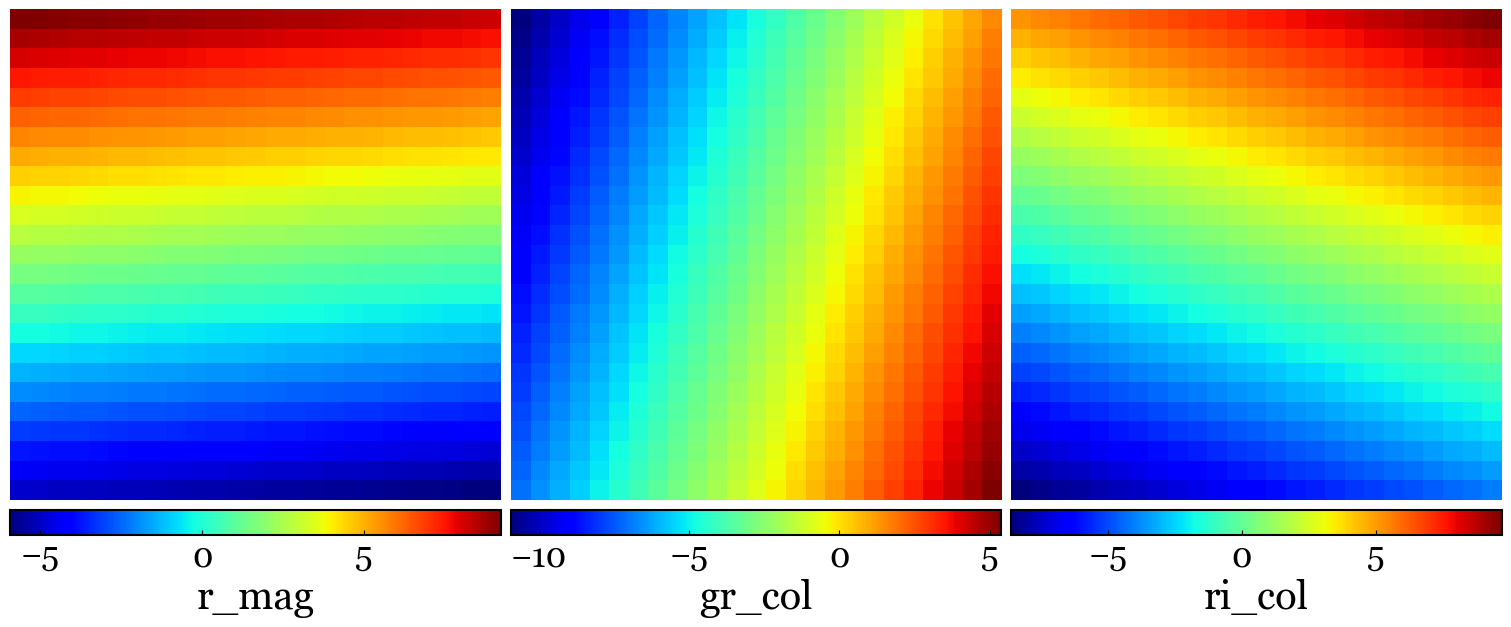

In [9]:
#Visualize SOM before training
SOM.show_map(cmap = 'jet')

#Look at initial quantization error
from mpdg_som_utils import SOM_ErrorEstimators

initial_quant_error = SOM_ErrorEstimators.quantization_error(SOM.weights_map,
                                                             SOM.data,
                                                             SOM.bmu_indices)
print(f'| Initial rms error: {initial_quant_error:.3f}')

IndexError: index 3 is out of bounds for axis 1 with size 3

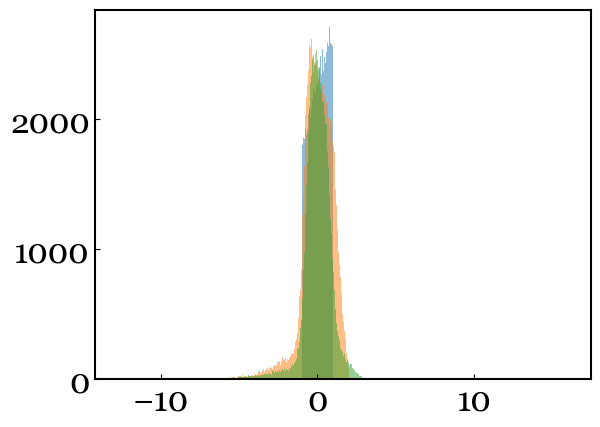

In [10]:
plt.hist(SOM.data[:, 0],
        bins = 'auto', alpha = 0.5)
plt.hist(SOM.data[:, 1],
        bins = 'auto', alpha = 0.5)
plt.hist(SOM.data[:, 2],
        bins = 'auto', alpha = 0.5)
plt.hist(SOM.data[:, 3],
        bins = 'auto', alpha = 0.5)
plt.hist(SOM.data[:, 4],
        bins = 'auto', alpha = 0.5)

In [11]:
#Train the som
SOM.train()

Step 1 complete. Error: 2.013                                   
Step 2 complete. Error: 1.500                                   
Step 3 complete. Error: 1.450                                   
Step 4 complete. Error: 1.713                                   
Step 5 complete. Error: 1.150                                   
Step 6 complete. Error: 1.345                                   
Step 7 complete. Error: 1.267                                   
Step 8 complete. Error: 1.179                                   
Step 9 complete. Error: 1.165                                   
Step 10 complete. Error: 1.128                                   
Step 11 complete. Error: 1.108                                   
Step 12 complete. Error: 1.088                                   
Step 13 complete. Error: 1.083                                   
Step 14 complete. Error: 0.992                                   
Step 15 complete. Error: 1.030                                   
Step 16 complete. E

0.9844157

In [34]:
np.save('/data2/lsajkov/mpdg/saved_soms/12Jul24_z0.1_KiDS/weights',
        SOM.weights_map, allow_pickle = True)


| SOM. Step 20. Initialization: pca


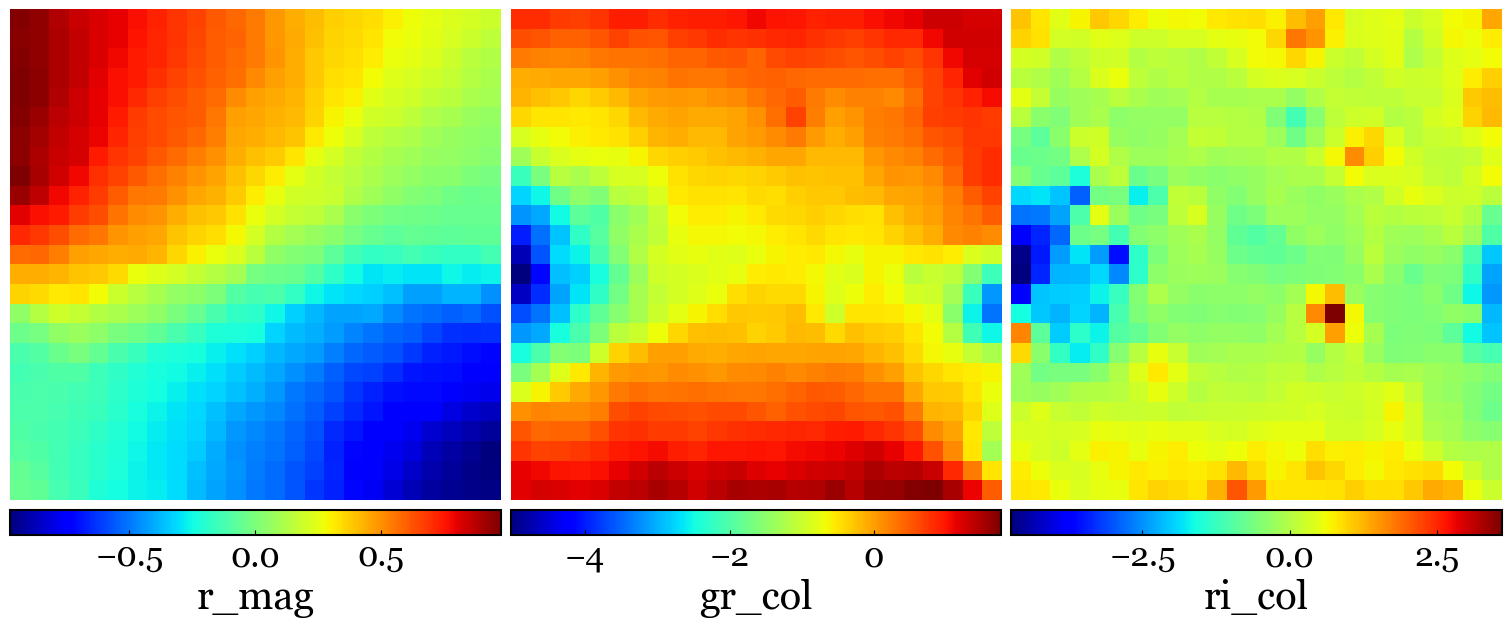

In [12]:
#Visualize the SOM after training
SOM.show_map(cmap = 'jet')


| SOM. Step 17. Initialization: pca


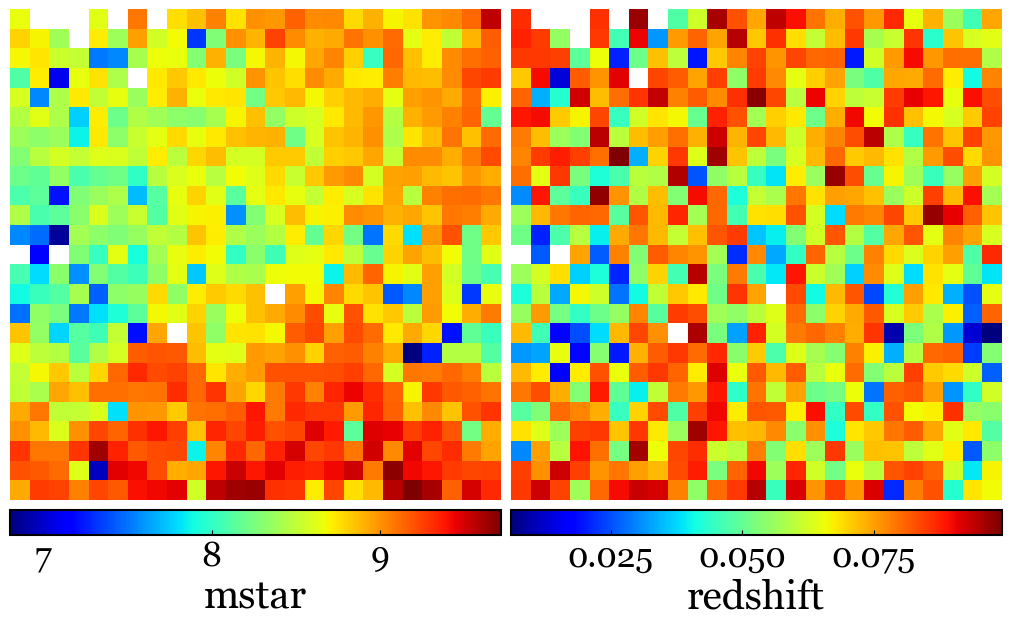

In [13]:
#Label the cells in the map with external parameters. Visualize the labeled map.
SOM.load_labeling_data(input_labels,
                       parameter_names = ['mstar', 'redshift'])
# SOM.normalize_labeling_data()

SOM.load_labeling_standard_deviations(input_label_stds)
# SOM.normalize_labeling_standard_deviations()

SOM.label_map()
# SOM.label_map(pdr = 1000,
#               sigmas_data= [0.1, 0.0075],
#               sigmas_add = [0, 0.0025])

SOM.show_map(show_labeled = True, log_norm = [],
             cmap = 'jet')

In [63]:
from mpdg_som_utils import find_bmu_coords
import matplotlib.pyplot as plt

In [14]:
SOM.predict(SOM.labeling_data[:, :SOM.data_dim],
            np.sqrt(SOM.label_variances[:, :SOM.data_dim]))

In [88]:
SOM.save_outputs('/data2/lsajkov/mpdg/saved_soms',
                 save_weights = True, save_parameters = True)

In [ ]:
np.save('/data2/lsajkov/mpdg/saved_soms/10Jul24/prediction_results',
        SOM.prediction_results, allow_pickle = True)

In [ ]:
np.save('/data2/lsajkov/mpdg/saved_soms/10Jul24/labeling_data',
        SOM.labeling_data, allow_pickle = True)

___

Look at prediction results

In [15]:
mstar_pred = SOM.prediction_results[:, 0]
redshift_pred = SOM.prediction_results[:, 1]

<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
/var/tmp/lsajkov/ipykernel_2360858/1229462552.py:17: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('log($M_*/M_{\odot}$)')


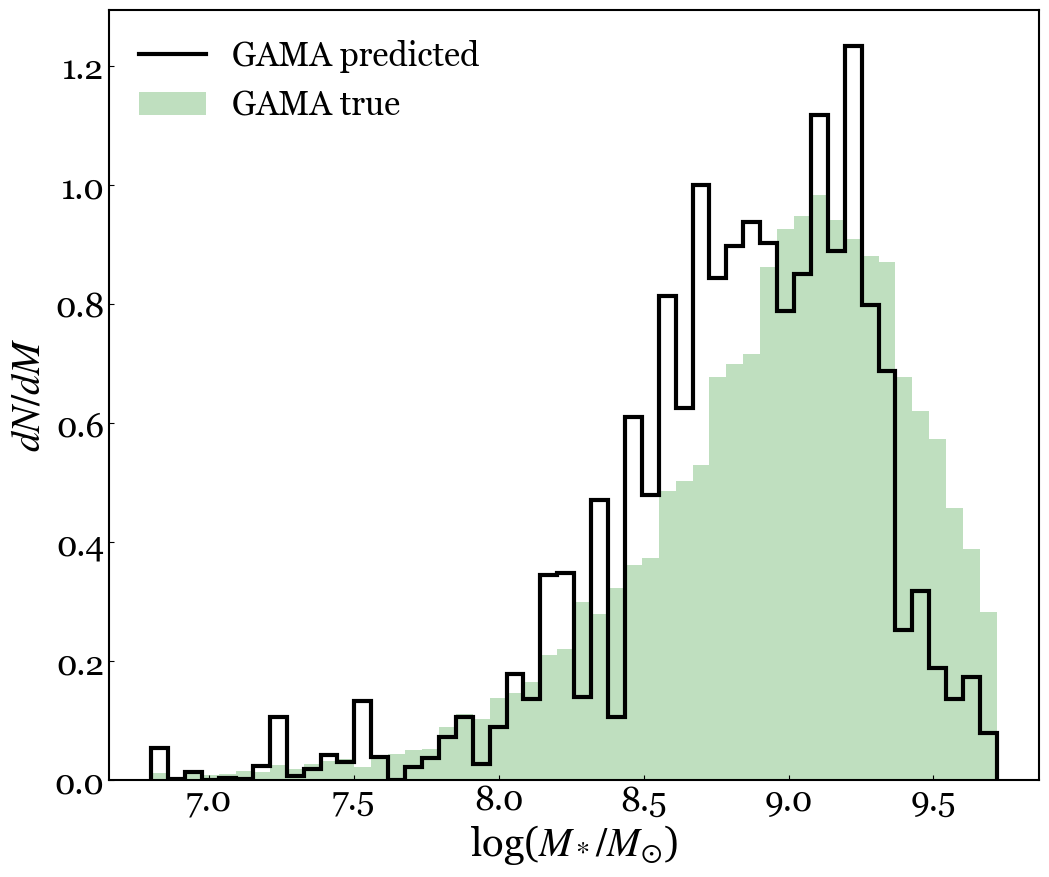

In [17]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

vals, bins = np.histogram(mstar_pred, bins = 50,
                          range = [np.nanmin(mstar_pred), np.nanmax(mstar_pred)],
                          density = True)

ax.stairs(vals, bins,
          color = 'black', linewidth = 3,
          label = 'GAMA predicted')

ax.hist(SOM.labeling_data[:, SOM.data_dim],
        bins = bins, density = True, zorder = 0,
        color = 'green', alpha = 0.25,
        label = 'GAMA true')

ax.set_xlabel('log($M_*/M_{\odot}$)')
ax.set_ylabel('$dN/dM$')

ax.legend(frameon = False)

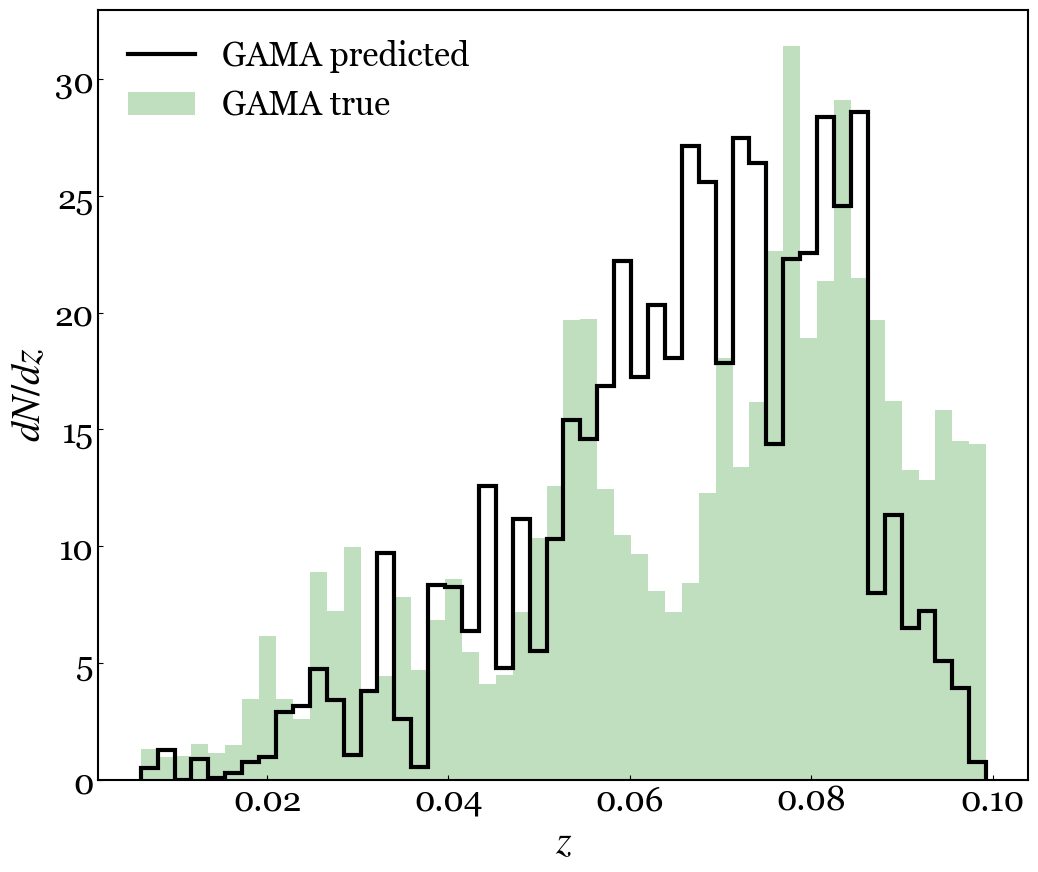

In [19]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

vals, bins = np.histogram(redshift_pred, bins = 50,
                          range = [np.nanmin(redshift_pred), np.nanmax(redshift_pred)],
                          density = True)

ax.stairs(vals, bins,
          color = 'black', linewidth = 3,
          label = 'GAMA predicted')

ax.hist(SOM.labeling_data[:, SOM.data_dim + 1],
        bins = bins, density = True, zorder = 0,
        color = 'green', alpha = 0.25,
        label = 'GAMA true')

ax.set_xlabel('$z$')
ax.set_ylabel('$dN/dz$')

ax.legend(frameon = False)

___

Compare predictions to inputs

In [62]:
import matplotlib.pyplot as plt

array([63, 63])

In [43]:
MAD

array([2.22047871e-05, 1.20136610e-05, 9.05140608e-05, ...,
       1.65127446e-05, 5.92118171e-06, 1.99735876e-05])

<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\o'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\o'
<>:33: SyntaxWarning: invalid escape sequence '\m'
/var/tmp/lsajkov/ipykernel_2360858/675380869.py:24: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel('GAMA log$_{10} (M_*/M_{\odot})$\nTrue')
/var/tmp/lsajkov/ipykernel_2360858/675380869.py:25: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel('Predicted\nSOM log$_{10} (M_*/M_{\odot})$')
/var/tmp/lsajkov/ipykernel_2360858/675380869.py:33: SyntaxWarning: invalid escape sequence '\m'
  label = '$N_{\mathrm{galaxies}}$')


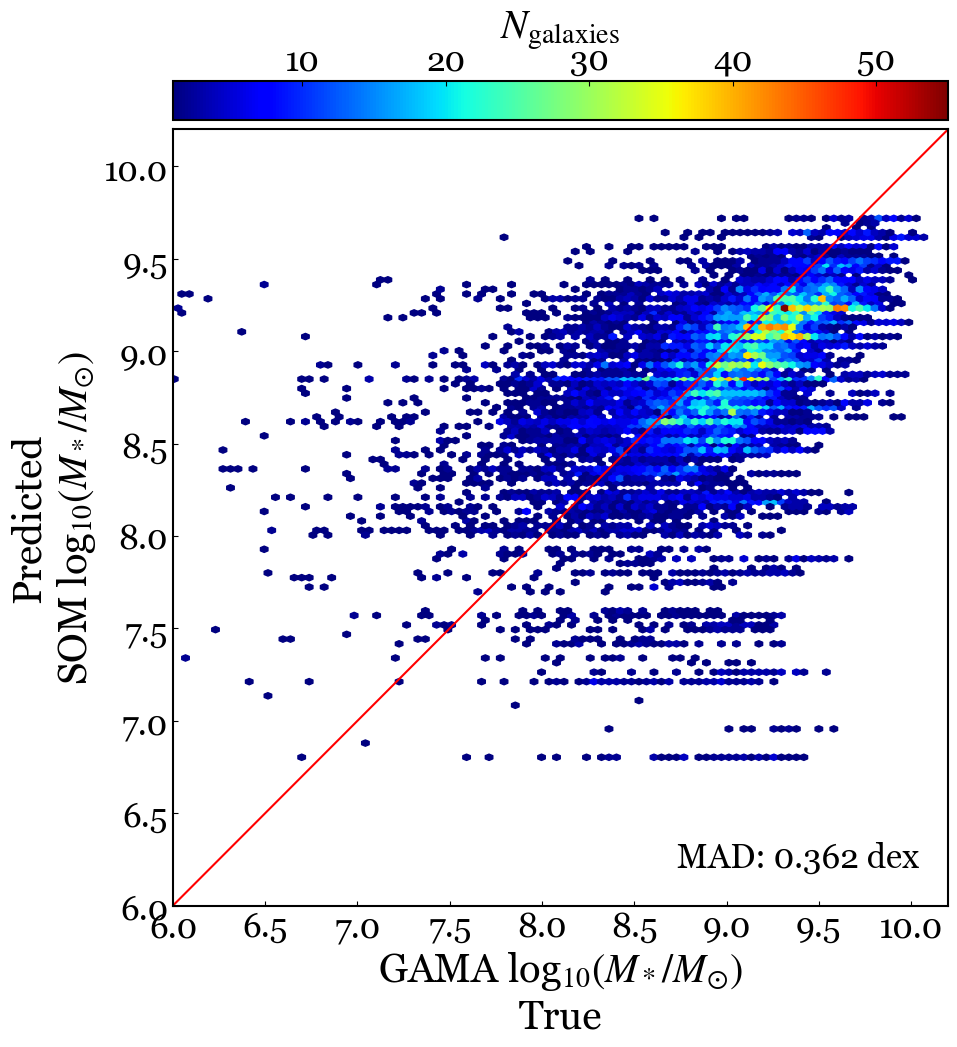

In [20]:
fig = plt.figure(figsize = (10, 12))

ax = fig.add_subplot()

hb = ax.hexbin(SOM.labeling_data[:, SOM.data_dim],
               SOM.prediction_results[:, 0],
               mincnt = 1, cmap = 'jet')

MAD = np.nansum(np.abs(SOM.labeling_data[:, SOM.data_dim] - SOM.prediction_results[:, 0]))/(len(SOM.prediction_results) - np.sum(np.isnan(SOM.prediction_results), axis = 0)[0])
# ax.scatter(SOM.labeling_data[:, SOM.data_dim][lo_stripe_idx],
#            SOM.prediction_results[:, 0][lo_stripe_idx],
#            color = 'green', s = 50, facecolor = 'none')

# ax.scatter(SOM.labeling_data[:, SOM.data_dim][hi_stripe_idx],
#            SOM.prediction_results[:, 0][hi_stripe_idx],
#            color = 'red', s = 50, facecolor = 'none')

ax.axline([10, 10], slope = 1, color = 'red')

ax.set_xlim(6, 10.2)
ax.set_ylim(6, 10.2)
ax.set_xticks(np.arange(6, 10.5, 0.5))

ax.set_xlabel('GAMA log$_{10} (M_*/M_{\odot})$\nTrue')
ax.set_ylabel('Predicted\nSOM log$_{10} (M_*/M_{\odot})$')

ax.text(0.65, 0.05,
        f'MAD: {MAD:.3f} dex',
        transform = ax.transAxes)

fig.colorbar(ax = ax, mappable = hb,
             location = 'top', pad = 0.01,
             label = '$N_{\mathrm{galaxies}}$')

In [ ]:
np.sum((SOM.prediction_results[:, 1] > 0.33) & (SOM.labeling_data[:, -1] > 0.33) )/len(SOM.prediction_results) * 100

<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
/var/tmp/lsajkov/ipykernel_2294254/1666569733.py:36: SyntaxWarning: invalid escape sequence '\m'
  label = '$N_{\mathrm{galaxies}}$')


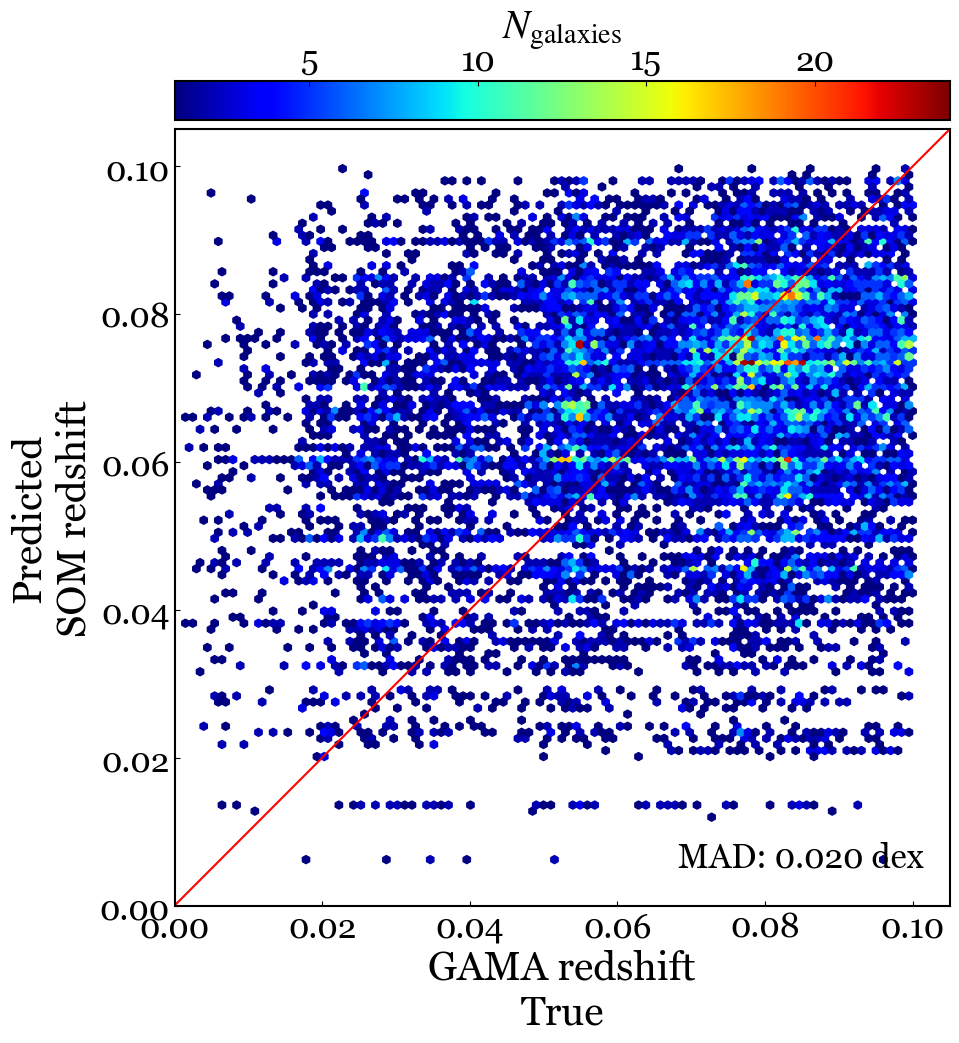

In [48]:
fig = plt.figure(figsize = (10, 12))

ax = fig.add_subplot()

hb = ax.hexbin(SOM.labeling_data[:, SOM.data_dim + 1],
               SOM.prediction_results[:, 1],
               mincnt = 1, cmap = 'jet')

MAD = np.nansum(np.abs(SOM.labeling_data[:, SOM.data_dim + 1] - SOM.prediction_results[:, 1]))/(len(SOM.prediction_results) - np.sum(np.isnan(SOM.prediction_results), axis = 0)[0])

# ax.scatter(SOM.labeling_data[:, SOM.data_dim + 1][lo_stripe_idx],
#            SOM.prediction_results[:, 1][lo_stripe_idx],
#            color = 'green', s = 50, facecolor = 'none')

# ax.scatter(SOM.labeling_data[:, SOM.data_dim + 1][hi_stripe_idx],
#            SOM.prediction_results[:, 1][hi_stripe_idx],
#            color = 'red', s = 50, facecolor = 'none')

ax.axline([0, 0], slope = 1, color = 'red')

ax.set_xlim(0, 0.105)
ax.set_ylim(0, 0.105)

ax.set_xlabel('GAMA redshift\nTrue')
ax.set_ylabel('Predicted\nSOM redshift')

ax.text(0.65, 0.05,
        f'MAD: {MAD:.3f} dex',
        transform = ax.transAxes)

# ax.axhline(0.33, color = 'black')
# ax.axvline(0.33, color = 'black')

fig.colorbar(ax = ax, mappable = hb,
             location = 'top', pad = 0.01,
             label = '$N_{\mathrm{galaxies}}$')

In [ ]:
SOM_zs = SOM.prediction_results[:, 1]

lo_stripe_idx = (SOM_zs < 0.4) & (SOM_zs > 0.35)
hi_stripe_idx = (SOM_zs < 0.6) & (SOM_zs > 0.5)

hi_stripe_r_mag = input_catalog_complete[-int(data_cut/2):][hi_stripe_idx]['r_mag']
lo_stripe_r_mag = input_catalog_complete[-int(data_cut/2):][lo_stripe_idx]['r_mag']

In [ ]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.hist(lo_stripe_r_mag, bins = 'auto',
        histtype = 'step', color = 'green', linewidth = 5)

ax.set_xlabel('$r$-magnitude')

In [ ]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.hist(hi_stripe_r_mag, bins = 'auto',
        histtype = 'step', color = 'red', linewidth = 5)

ax.set_xlabel('$r$-magnitude')